In [1]:
import pandas as pd
import numpy as np

In [2]:
post_df = pd.read_csv('post.csv',index_col=['id'])
comment_df = pd.read_csv('comment.csv',index_col=['comment_id'])

In [3]:
post_df.head()

,author,author_id,total_comments,upvote,post_type,title,body,downvote,url,created_on,subreddit,subreddit_id
id,,,,,,,,,,,,
12glkw4,TheBodyPolitic1,von3w6y2,319,591,top week,Why didn't Python become popular until long af...,"Python was invented in 1994, two years before ...",37,https://www.reddit.com/r/Python/comments/12glk...,2023-04-09 14:51:49,python,t5_2qh0y
12hj9oc,MetonymyQT,shnqm,80,527,top week,Free course: Build a modern API with FastAPI a...,Hello everyone! \n\nI've posted this course 4 ...,21,https://www.reddit.com/r/Python/comments/12hj9...,2023-04-10 13:45:11,python,t5_2qh0y
12egsoz,2broke2code,rs4dqilj,105,467,top week,"I trained a RoastBot on >120,000 faces and >0....",It uses facial recognition to fetch roasts for...,35,https://www.reddit.com/r/Python/comments/12egs...,2023-04-07 10:36:18,python,t5_2qh0y
12ffsif,midnitte,3gad9,64,378,top week,EP 684: A Per-Interpreter GIL Accepted,NaN,11,https://discuss.python.org/t/pep-684-a-per-int...,2023-04-08 08:26:37,python,t5_2qh0y
12fzdu2,aeluro1,88efmodhn,12,370,top week,Comprehensive Reddit Saved Posts Downloader - ...,"Hi all, I made a post about this a couple of d...",11,https://www.reddit.com/r/Python/comments/12fzd...,2023-04-08 21:43:41,python,t5_2qh0y


In [4]:
comment_df.head()

,post_id,parent_id,body,created_on,upvotes,author_id,author_name
comment_id,,,,,,,
jfkvwx0,12glkw4,t3_12glkw4,Hardware wasn't ready for Python in that time,2023-04-09 15:27:18,5,22vat21u,DusikOff
jfnha98,12glkw4,t3_12glkw4,Because Python was developed with the conceit ...,2023-04-10 02:55:16,2,4wtjvsh6,FredVIII-DFH
jflnf2e,12glkw4,t3_12glkw4,Perl was *the* scripting language in the early...,2023-04-09 18:37:04,2,4i9hp,tommasz
jflbch7,12glkw4,t3_12glkw4,"I was a web developer between 2000 and 2010, a...",2023-04-09 17:13:45,2,8hi6986p,Asleep-Dress-3578
jfmk972,12glkw4,t1_jflbch7,"Adding on to this from my POV, early web in th...",2023-04-09 22:33:38,3,380he,snapetom


# Analysing 1st post comments

In [5]:
fp_comments = comment_df.loc[comment_df['post_id']=='12glkw4']
fp_comments.head()

,post_id,parent_id,body,created_on,upvotes,author_id,author_name
comment_id,,,,,,,
jfkvwx0,12glkw4,t3_12glkw4,Hardware wasn't ready for Python in that time,2023-04-09 15:27:18,5,22vat21u,DusikOff
jfnha98,12glkw4,t3_12glkw4,Because Python was developed with the conceit ...,2023-04-10 02:55:16,2,4wtjvsh6,FredVIII-DFH
jflnf2e,12glkw4,t3_12glkw4,Perl was *the* scripting language in the early...,2023-04-09 18:37:04,2,4i9hp,tommasz
jflbch7,12glkw4,t3_12glkw4,"I was a web developer between 2000 and 2010, a...",2023-04-09 17:13:45,2,8hi6986p,Asleep-Dress-3578
jfmk972,12glkw4,t1_jflbch7,"Adding on to this from my POV, early web in th...",2023-04-09 22:33:38,3,380he,snapetom


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
upvote_rec = fp_comments.groupby(fp_comments['author_name']).apply(lambda x: {
    "total_upvote":x['upvotes'].sum(),
    'total_comments':len(x)
})
upvote_rec

author_name
AbdussamiT               {'total_upvote': 42, 'total_comments': 2}
Agent281                {'total_upvote': 368, 'total_comments': 1}
Alphasite                 {'total_upvote': 2, 'total_comments': 1}
Asleep-Dress-3578         {'total_upvote': 2, 'total_comments': 1}
Barn07                    {'total_upvote': 4, 'total_comments': 1}
Bling-Crosby              {'total_upvote': 2, 'total_comments': 1}
CevicheCabbage            {'total_upvote': 9, 'total_comments': 1}
Classic_Department42      {'total_upvote': 6, 'total_comments': 1}
Deto                      {'total_upvote': 3, 'total_comments': 1}
DonkeyTron42              {'total_upvote': 2, 'total_comments': 1}
DusikOff                  {'total_upvote': 5, 'total_comments': 1}
FredVIII-DFH              {'total_upvote': 2, 'total_comments': 1}
LifeHasLeft               {'total_upvote': 4, 'total_comments': 2}
LittleMlem                {'total_upvote': 9, 'total_comments': 1}
Material-Resource-19     {'total_upvote': 16, 'tot

## **Most upvotes users in comments**

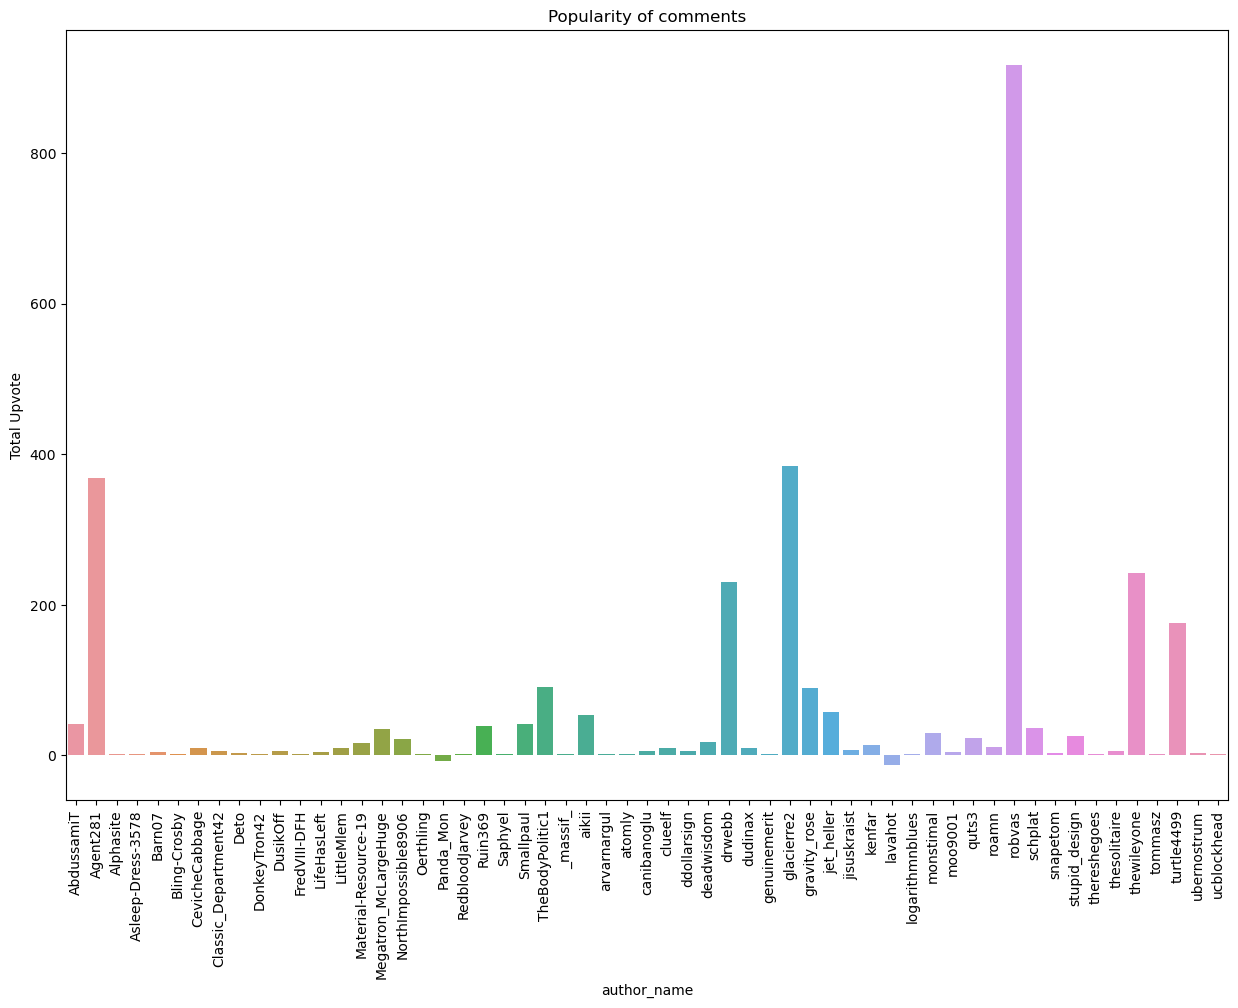

In [8]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
plt.xticks(rotation=90)
ax.set_xlabel('author_name')
ax.set_ylabel('Total Upvote')
ax.set_title('Popularity of comments')
sns.barplot(x=upvote_rec.index,y=[data['total_upvote'] for data in upvote_rec],ax=ax)
plt.show()

## **Most repeated words in comments**

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sw = set(stopwords.words('english'))

comments = fp_comments['body'].values.tolist()

corpus = [word.lower() for comment in comments for word in word_tokenize(comment) if word.lower() not in sw and word.isalpha()]
corpus[:5]

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/slowgamer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['hardware', 'ready', 'python', 'time', 'python']

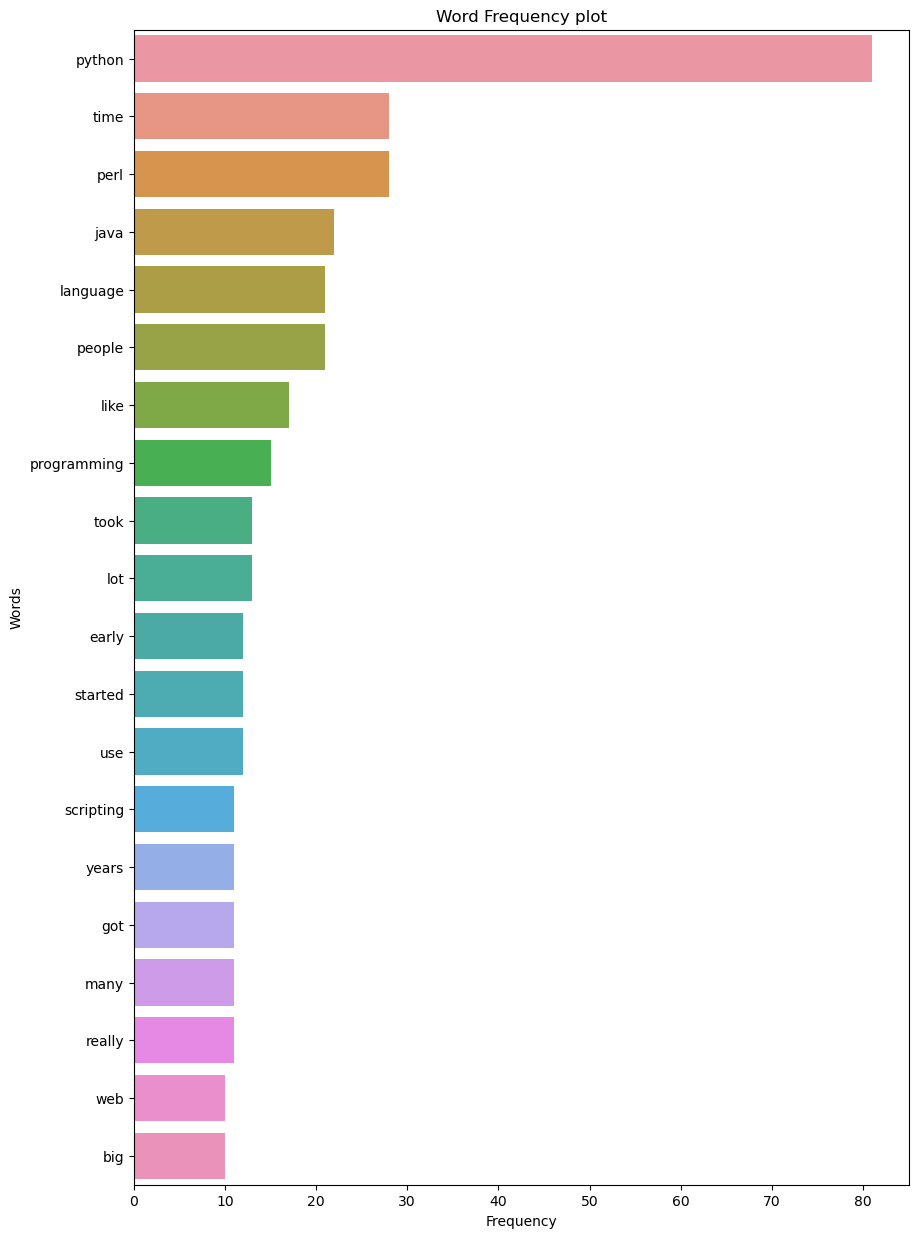

In [10]:
from collections import Counter

fig,ax = plt.subplots(1,1,figsize=(10,15))
word_counts = dict(Counter(corpus).most_common(20))
ax.set_xlabel('Frequency')
ax.set_ylabel('Words')
ax.set_title('Word Frequency plot')
sns.barplot(x=list(word_counts.values()),y=list(word_counts.keys()),ax=ax)
plt.show()

In [52]:
from wordcloud import WordCloud, STOPWORDS

sw = set(STOPWORDS)

def generate_cloud(data,n_grams=2):
    fig, ax = plt.subplots(1,1,figsize=(15,15))
    wordcloud = WordCloud(
        background_color='white',
        stopwords=sw,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1,
        collocation_threshold=n_grams
    ).generate(data)

    ax.imshow(wordcloud)
    ax.axis('off')
    plt.show()

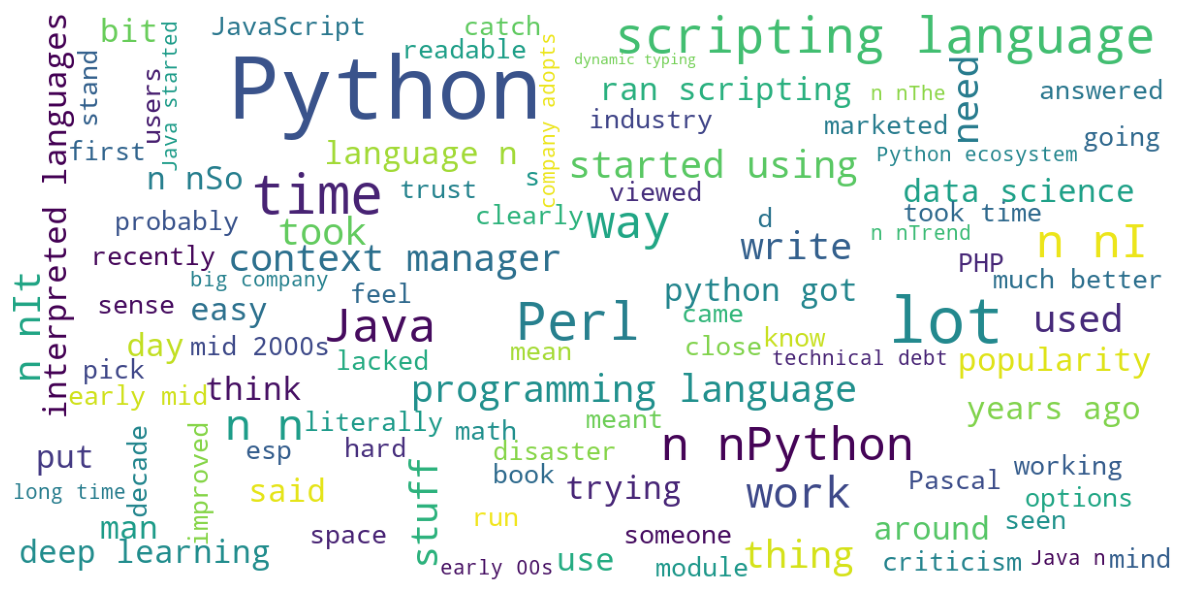

In [12]:
generate_cloud(str(fp_comments['body'].values).replace('\n',' '))

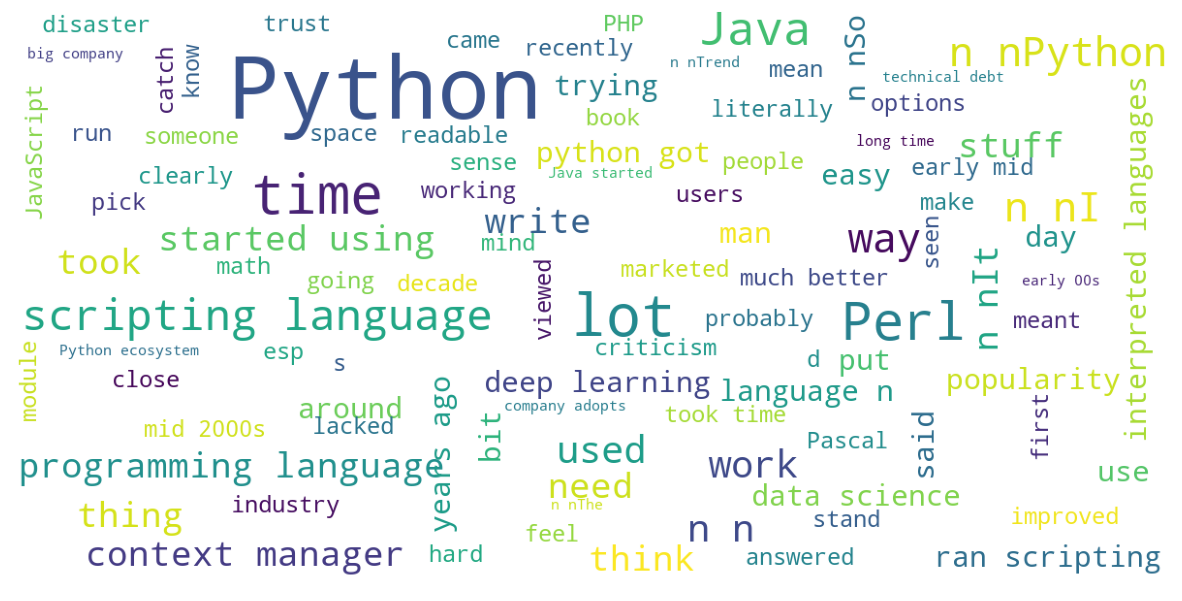

In [13]:
generate_cloud(str(fp_comments['body'].values).replace('\n',' '),n_grams=2)

# Sentiment Analysis

**Using Text Blob Library**

In [16]:
from textblob import TextBlob

def polarity_score(text):
    return TextBlob(text).sentiment.polarity

In [30]:
fp_comments['comment_sent_score'] =  fp_comments['body'].apply(lambda text: polarity_score(text))

/tmp/ipykernel_30060/1826135865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_comments['comment_sent_score'] =  fp_comments['body'].apply(lambda text: polarity_score(text))


In [31]:
fp_comments[['body','comment_sent_score']]

,body,comment_sent_score
comment_id,,
jfkvwx0,Hardware wasn't ready for Python in that time,0.200000
jfnha98,Because Python was developed with the conceit ...,0.212500
jflnf2e,Perl was *the* scripting language in the early...,-0.037500
jflbch7,"I was a web developer between 2000 and 2010, a...",0.292308
jfmk972,"Adding on to this from my POV, early web in th...",0.080903
...,...,...
jfnxolg,"We have to start calling Python as JavaPython,...",0.000000
jfnvotv,Java was incredibly popular because it filled ...,0.304048
jfktbt2,"Fair point, but Python became popular and I ca...",0.041667


<AxesSubplot: >

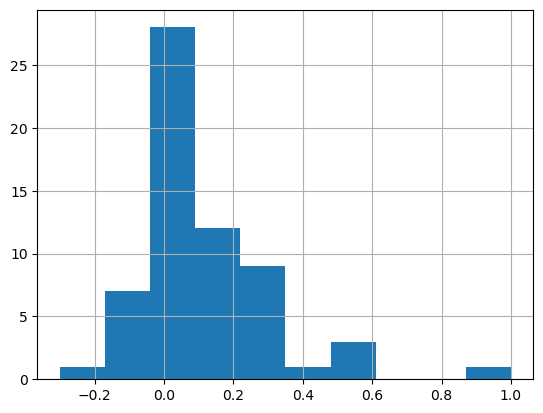

In [32]:
fp_comments['comment_sent_score'].hist()

In [29]:
def sentiment(score):
    return 'positive' if score>0 else 'negative' if score<0 else 'neutral'

In [35]:
fp_comments['comment_sentiment'] = fp_comments['comment_sent_score'].apply(lambda score:sentiment(score))

/tmp/ipykernel_30060/3742194281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_comments['comment_sentiment'] = fp_comments['comment_sent_score'].apply(lambda score:sentiment(score))


In [36]:
fp_comments[['body','comment_sentiment']]

,body,comment_sentiment
comment_id,,
jfkvwx0,Hardware wasn't ready for Python in that time,positive
jfnha98,Because Python was developed with the conceit ...,positive
jflnf2e,Perl was *the* scripting language in the early...,negative
jflbch7,"I was a web developer between 2000 and 2010, a...",positive
jfmk972,"Adding on to this from my POV, early web in th...",positive
...,...,...
jfnxolg,"We have to start calling Python as JavaPython,...",neutral
jfnvotv,Java was incredibly popular because it filled ...,positive
jfktbt2,"Fair point, but Python became popular and I ca...",positive


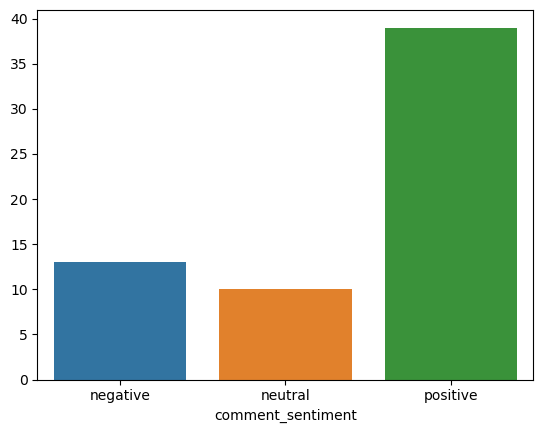

In [47]:
cnt = fp_comments.groupby(fp_comments['comment_sentiment'])['body'].count()

sns.barplot(x=cnt.index,y=cnt.values)
plt.show()

**Segmenting comments by sentiment and plotting word cloud**

**Positive Sentiment**

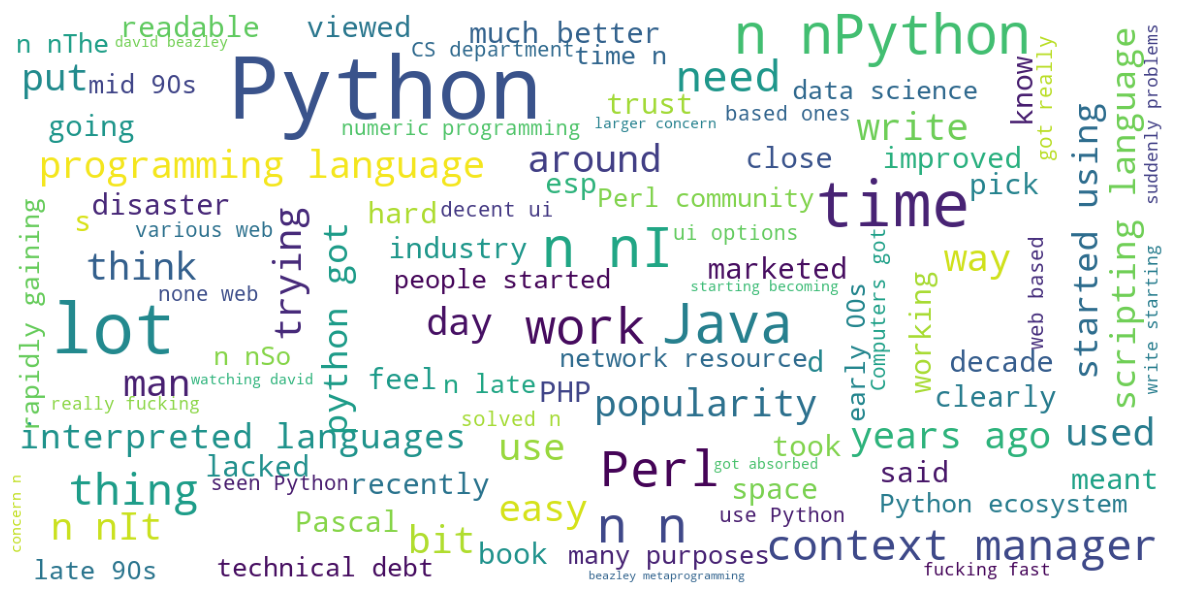

In [48]:
generate_cloud(str(fp_comments.loc[fp_comments['comment_sentiment']=='positive']['body'].values).replace('\n',' '))

**Negative Sentiment**

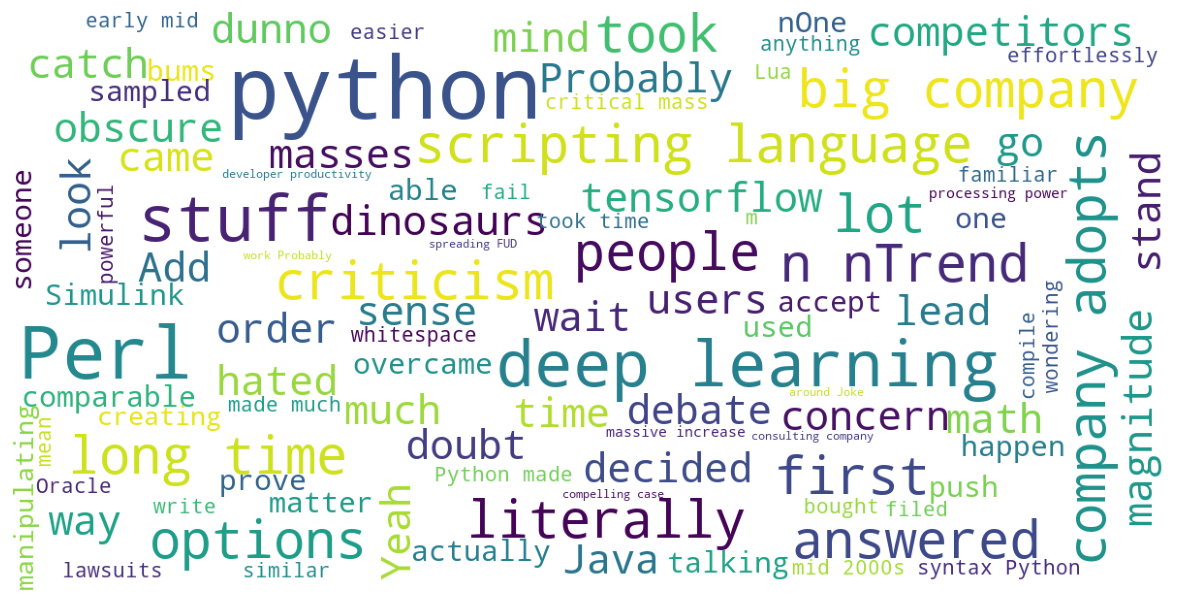

In [54]:
generate_cloud(str(fp_comments.loc[fp_comments['comment_sentiment']=='negative']['body'].values).replace('\n',' '))

**Neutral Sentiment**

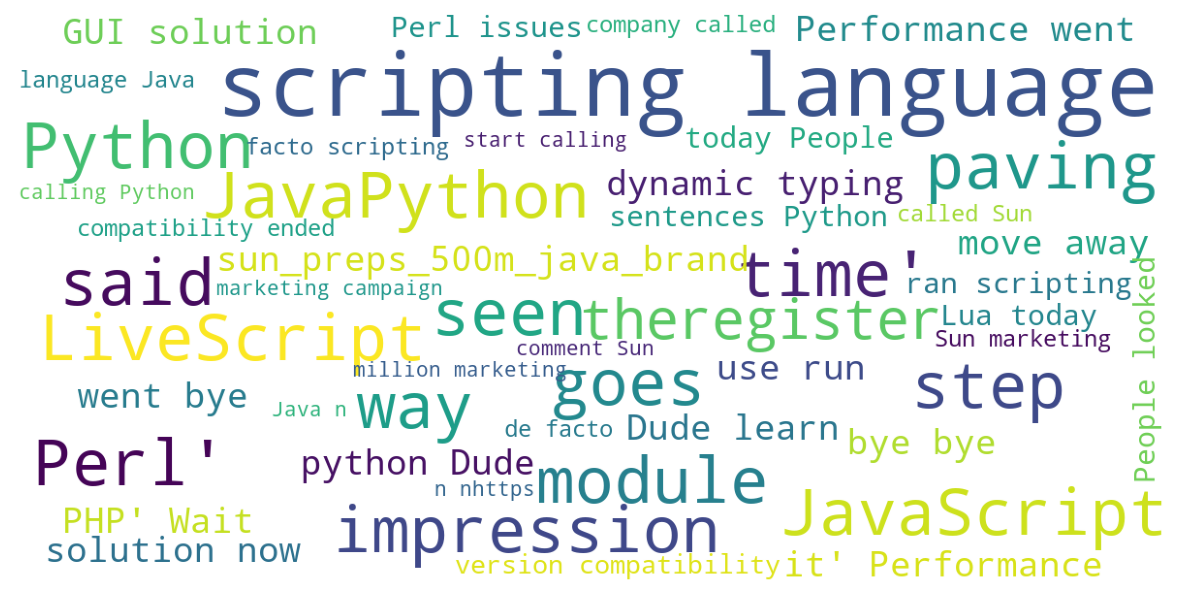

In [53]:
generate_cloud(str(fp_comments.loc[fp_comments['comment_sentiment']=='neutral']['body'].values).replace('\n',' '))